In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from importlib import reload

import TSManager as ts

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reload(ts)
mgr = ts.TSManager()

In [3]:
mgr.load()

Loading CAY
Loading SPX
Loading PCR
Loading BDI
Loading NOS
Loading OIL
Loading DP
Loading IC
Loading DEF
Loading SIM
Loading PE
Loading BM
Loading VRP
Loading MA
Loading TERM
Loading CAPE
Loading PCAPrice
Loading BY
Loading SI
Loading CPI


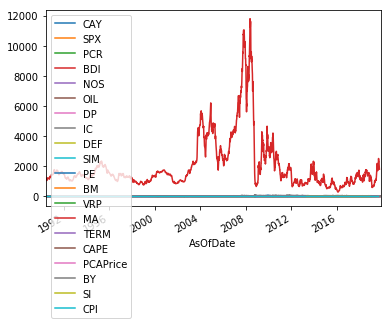

In [4]:
mgr.data.plot()

Text(0.5, 1.0, 'Percent missing data by feature')

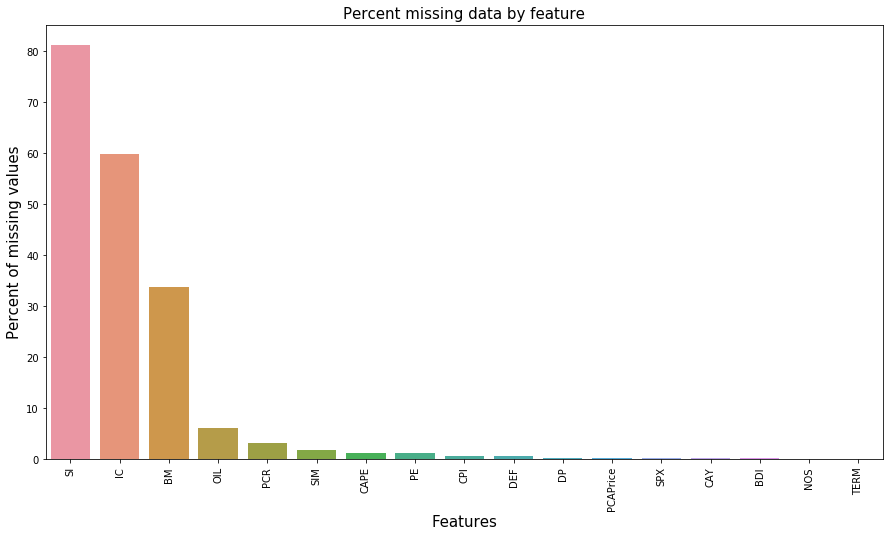

In [5]:
all_data_na = (mgr.data.isna().sum() / len(mgr.data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:17]
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)